Celem projektu jest opracowanie modelu regresji pokazujacego trend w wybranym przez nas zbiorze danych, wraz z jego analiza eksploracyjna.

Wybralismy zbior danych - Human Resources Data Set (https://www.kaggle.com/datasets/rhuebner/human-resources-data-set) jest to stworzony przez Pania Dr. Carla Patalano i Pana Dr. Rich Huebnera z New England College of Business, do nauki Tableau.

Zbior zawiera imiona i nazwiska, date urodzenia, wiek, plec, stan cywilny, date zatrudnienia, powody rozwiazania umowy, dzial, czy firma jest aktywna czy rozwiazana, stanowisko, stawke wynagrodzenia, nazwisko menedzera, wynik wydajnosci, nieobecnosci, data najnoszej oceny wynikow i wynik zaangazowania pracownikow.

Przykladowe pytania do inspiracji postawienia hipotezy do posiadanych danych podane przez osoby publikujace zbior danych:
1. Czy istnieje zwiazek miedzy tym, dla kogo dana osoba pracuje, a jej wynikami?
2. Jaki jest ogolny profil roznorodnosci organizacji?
3. Jakie sa nasze najlepsze zrodla rekrutacji, jesli chcemy zapewnic zroznicowana organizacje?
4. Czy mozemy przewidziec, kto odejdzie, a kto nie? Jaki poziom dokladnosci mozemy w tym przypadku osiagnac
5. Czy sa obszary firmy, w ktorych wynagrodznie nie jest sprawiedliwe?


In [2]:
# Wczytanie podstawowych bibliotek
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Wczytanie danych
dtype_dict = {'Employee_Name': str, 'EmpID': int, 'MarriedID': int, 'MaritalStatusID': int, 'GenderID': int, 'EmpStatusID': int, 'DeptID': int, 'PerfScoreID': int, 'FromDiversityJobFairID': int, 'Salary': int, 'Termd': int, 'PositionID': int, 'Position': str, 'State': str, 'Zip': int, 'DOB': str, 'Sex': str, 'MaritalDesc': str, 'CitizenDesc': str, 'HispanicLatino': str, 'RaceDesc': str, 'DateofHire': str, 'DateofTermination': str, 'TermReason': str, 'EmploymentStatus': str, 'Department': str, 'ManagerName': str, 'ManagerID': float, 'RecruitmentSource': str, 'PerformanceScore': str, 'EngagementSurvey': float, 'EmpSatisfaction': int, 'SpecialProjectsCount': int, 'LastPerformanceReview_Date': str, 'DaysLateLast30': int, 'Absences': int}
data = pd.read_csv('HRDataset_v14.csv', sep=',', dtype=dtype_dict)
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
# Zamiana dat na obiekty daty
data['DOB'] = data['DOB'].apply(lambda x: x.split('/'))
data['DOB'] = data['DOB'].apply(lambda x: x[0] + '/' + x[1] + '/19' + x[2])
data['DOB'] = pd.to_datetime(data['DOB'], format='%m/%d/%Y')

data['DateofHire'] = pd.to_datetime(data['DateofHire'], format='%m/%d/%Y')
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'], format='%m/%d/%Y')
data['LastPerformanceReview_Date'] = pd.to_datetime(data['LastPerformanceReview_Date'], format='%m/%d/%Y')

# Mozna byloby tez Zamienic daty na liczby, na przyklad wiek, liczbe dni od zatrudnienia itp.

In [5]:
data['Zip'].unique()

array([ 1960,  2148,  1810,  1886,  2169,  1844,  2110,  2199,  1902,
        2062, 78230,  2747,  2050,  2145,  1915,  2026,  2452,  2072,
        2027,  2031,  2171,  2210,  6033,  2468,  1901,  1701,  1450,
        1013,  2043, 21851,  1890,  2184,  2132,  5664,  2763,  2045,
        2170,  1845, 78207,  1775,  2044,  1752,  2134,  1880,  1803,
        2030,  2189,  1821,  6278,  5473,  2458,  2138,  2176, 36006,
        2343,  2061,  2180, 98052,  2351,  2125,  2119, 90007,  1731,
        1749,  2133,  2129,  1824,  2324,  2155,  2143,  2330,  1460,
        6050,  6040,  1905,  2121, 43050,  2451, 46204,  2127,  2135,
        2108,  2128,  2472,  1864, 37129,  2149,  2021,  3062,  2445,
        2493,  2908,  1742,  2081,  1778,  2109,  2301,  2446, 19444,
        1887, 80820,  1721,  1801, 10171,  2090,  2048,  2126,  1776,
       84111,  1770,  6070,  2122,  1938, 78789,  1760,  2346,  2453,
        1550,  2056,  2421,  2136, 30428,  1040,  2152,  2492, 33174,
        2478, 27229,

In [6]:
# Dane takie jak EmpID, Zip, 
data = data.drop(['EmpID', 'Zip', 'ManagerID'], axis=1)

In [7]:
data.columns

Index(['Employee_Name', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   MarriedID                   311 non-null    int32         
 2   MaritalStatusID             311 non-null    int32         
 3   GenderID                    311 non-null    int32         
 4   EmpStatusID                 311 non-null    int32         
 5   DeptID                      311 non-null    int32         
 6   PerfScoreID                 311 non-null    int32         
 7   FromDiversityJobFairID      311 non-null    int32         
 8   Salary                      311 non-null    int32         
 9   Termd                       311 non-null    int32         
 10  PositionID                  311 non-null    int32         
 11  Position                    311 non-null    object        

In [9]:
for col in data.columns:
    print(col, data[col].unique())

Employee_Name ['Adinolfi, Wilson  K' 'Ait Sidi, Karthikeyan   ' 'Akinkuolie, Sarah'
 'Alagbe,Trina' 'Anderson, Carol ' 'Anderson, Linda  ' 'Andreola, Colby'
 'Athwal, Sam' 'Bachiochi, Linda' 'Bacong, Alejandro '
 'Baczenski, Rachael  ' 'Barbara, Thomas' 'Barbossa, Hector'
 'Barone, Francesco  A' 'Barton, Nader' 'Bates, Norman' 'Beak, Kimberly  '
 'Beatrice, Courtney ' 'Becker, Renee' 'Becker, Scott' 'Bernstein, Sean'
 'Biden, Lowan  M' 'Billis, Helen' 'Blount, Dianna' 'Bondwell, Betsy'
 'Booth, Frank' 'Boutwell, Bonalyn' 'Bozzi, Charles' 'Brill, Donna'
 'Brown, Mia' 'Buccheri, Joseph  ' 'Bugali, Josephine ' 'Bunbury, Jessica'
 'Burke, Joelle' 'Burkett, Benjamin ' 'Cady, Max ' 'Candie, Calvin'
 'Carabbio, Judith' 'Carey, Michael  ' 'Carr, Claudia  N'
 'Carter, Michelle ' 'Chace, Beatrice ' 'Champaigne, Brian' 'Chan, Lin'
 'Chang, Donovan  E' 'Chigurh, Anton' 'Chivukula, Enola'
 'Cierpiszewski, Caroline  ' 'Clayton, Rick' 'Cloninger, Jennifer'
 'Close, Phil' 'Clukey, Elijian' 'Cockel, Ja

In [10]:
num = []
other = []
for i, col in enumerate(data.columns, 1):
    if "int" in str(data[col].dtype) or "float" in str(data[col].dtype):
        num.append(col)
    else:
        other.append(col)
print(len(num))
print(len(other))
print(num)
print(other)
for col in num:
    print(col, data[col].unique())

15
18
['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']
['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date']
MarriedID [0 1]
MaritalStatusID [0 1 2 4 3]
GenderID [1 0]
EmpStatusID [1 5 3 4 2]
DeptID [5 3 4 1 6 2]
PerfScoreID [4 3 2 1]
FromDiversityJobFairID [0 1]
Salary [ 62506 104437  64955  64991  50825  57568  95660  59365  47837  50178
  54670  47211  92328  58709  52505  57834  70131  59026 110000  53250
  51044  64919  62910  66441  57815 103613 106367  74312  53492  63000
  65288  64375  74326  63763  62162  77692  72640  93396  52846 100031
  71860  61656 110929  54237 

<h1>Analiza ekspolarycyjna</h1>

In [135]:
# Wybranie danych numerycznych
num = []
for i, col in enumerate(data.columns, 1):
    if "int" in str(data[col].dtype) or "float" in str(data[col].dtype):
        num.append(col)
print(len(num))
num

15


['MarriedID',
 'MaritalStatusID',
 'GenderID',
 'EmpStatusID',
 'DeptID',
 'PerfScoreID',
 'FromDiversityJobFairID',
 'Salary',
 'Termd',
 'PositionID',
 'EngagementSurvey',
 'EmpSatisfaction',
 'SpecialProjectsCount',
 'DaysLateLast30',
 'Absences']

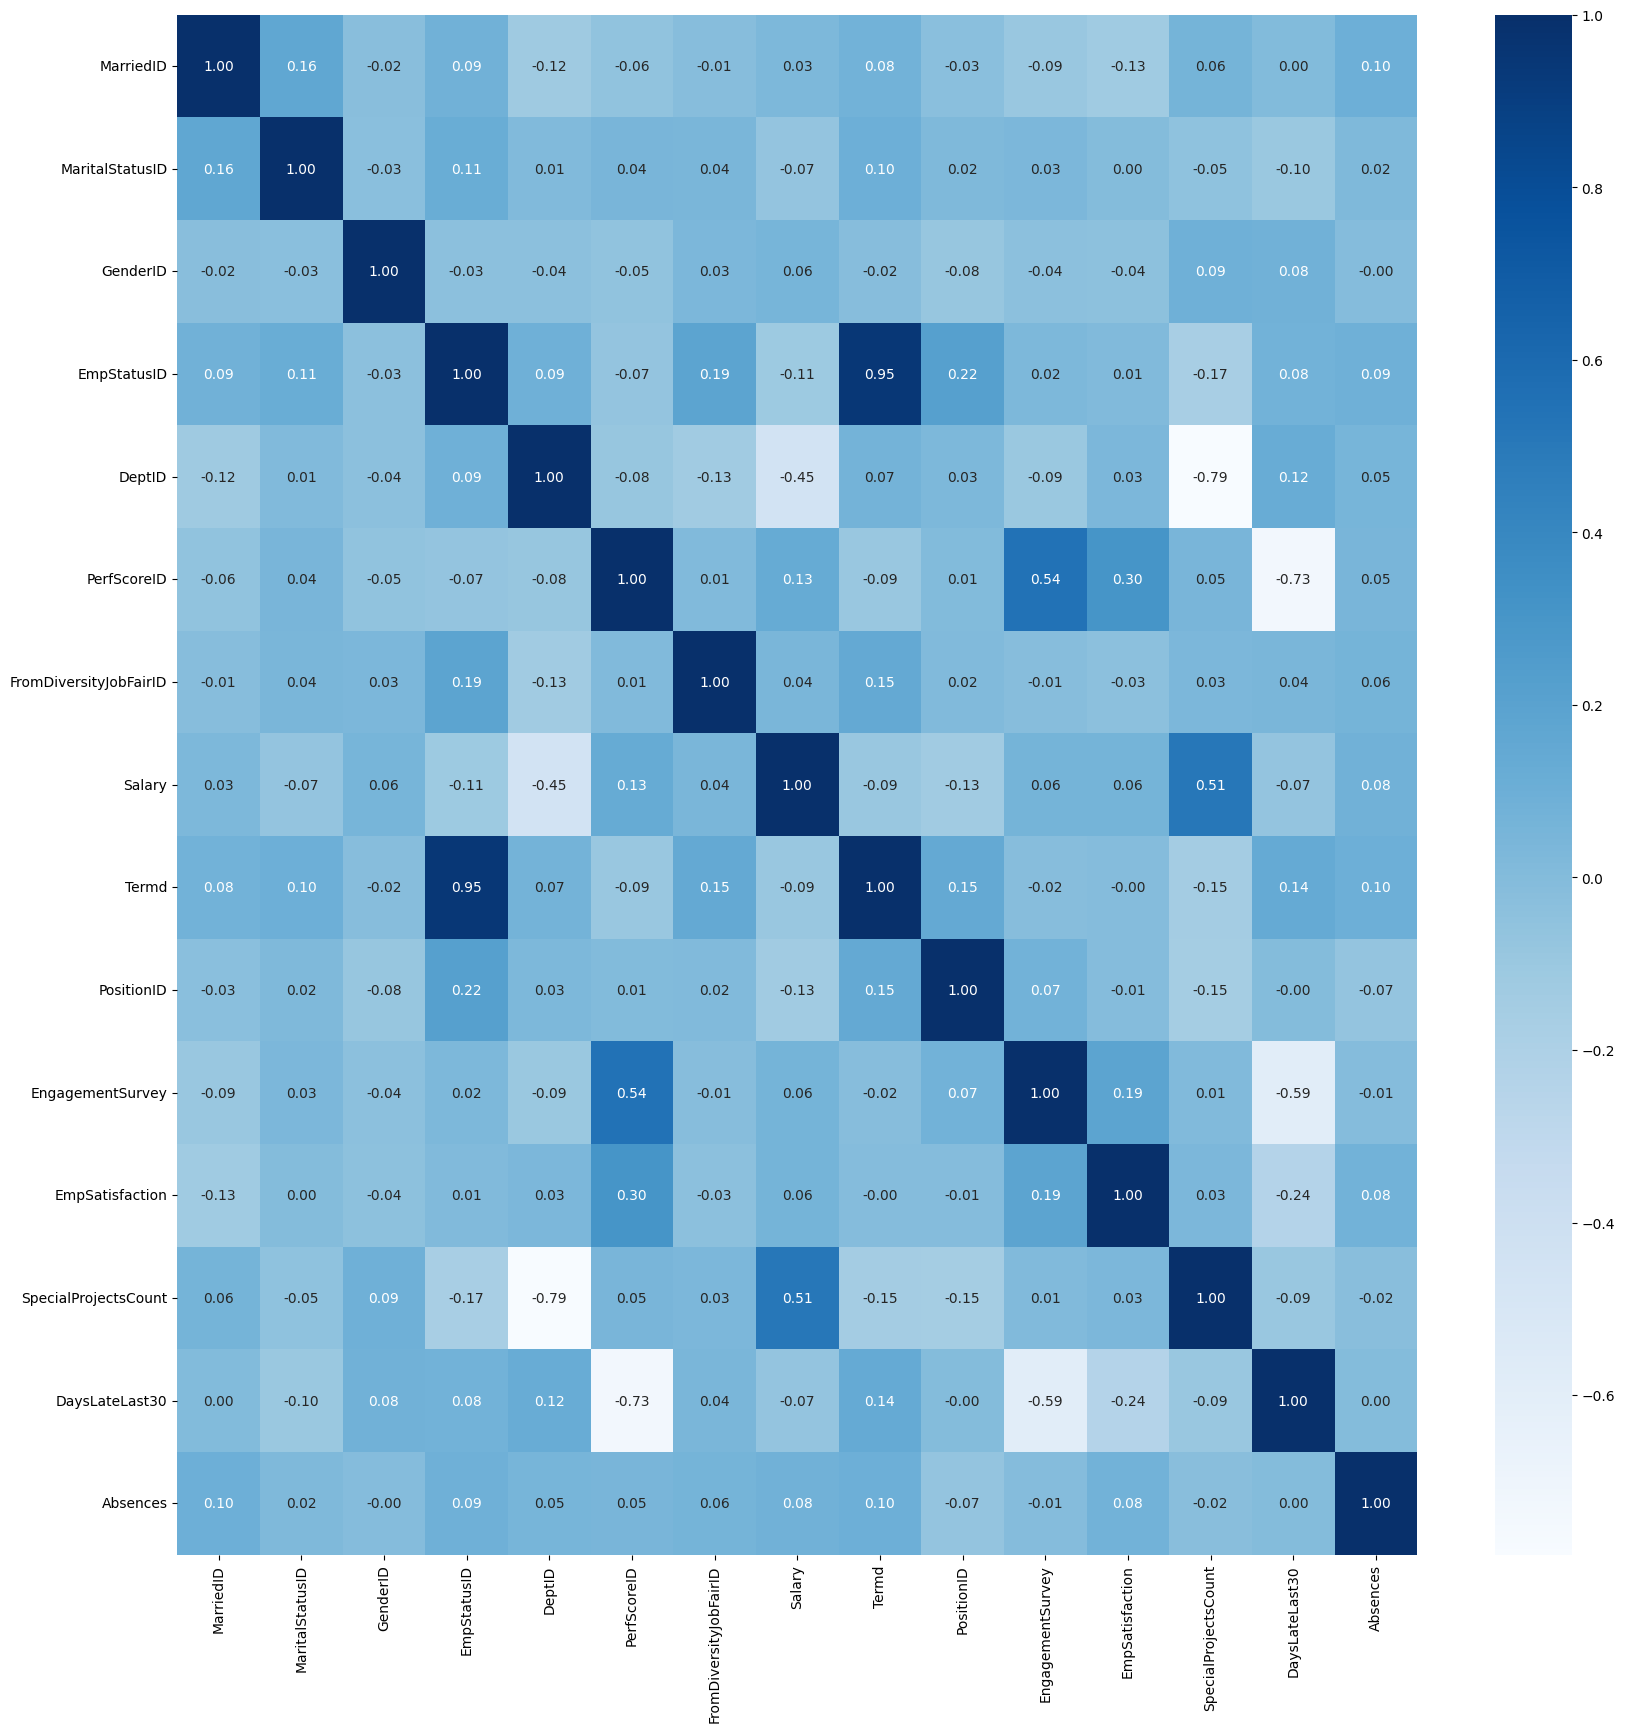

In [140]:
# Sprawdzenie zaleznosci miedzy danymi numerycznymi
plt.figure(figsize=(20, 20))
sns.heatmap(data[num].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

Interpretacja powyzszej macierzy korelacji.
Przypomnienie: Korelacja może przyjąć wartości od -1 do +1. Odchylenie skrajnie ujemne oznacza, że im wyższa jest wartość jednej zmiennej, tym niższa dla drugiej, z kolei skrajnie dodatni wynik oznacza, że obie wartości będą rosły lub malały synchronicznie. 0 wskazuje na całkowity brak związku pomiędzy zmiennymi.

Wiekszosc cech ma korelacje miedzy soba w okolicach zera, czyli nie wystepuje pomiedzy nimi ani korelacja dodatnia ani ujemna. Jednakze jest kilka wyjatkow.

Silna korelacja dodatnia: 
1. Termd ([0 1])  i EmpStatusID ([1 2 ... 5])


Umiarkowana korelacja dodatnia: 
1. EmpSatisfaction ([1 2 ... 5])  i PerfScoreID ([1 2 3 4])
2. SpecialProjectsCount ([0 1 ... 8]) i Salary ([54046 ... 250000])

Silna korelacja ujemna: 
1. SpecialProjectsCount ([0 1 ... 8]) i DeptID ([1 2 ... 6]) 
2. DaysLaterLast30 ([0 1 ... 6]) i PerfScoreID ([1 2 3 4])

Umiarkowana korelacja ujemna:
1. Salary ([54046 ... 250000]) i DeptID ([1 2 ... 6]) 
2. DaysLaterLast30 ([0 1 ... 6]) i EngagementSurvey ([1.12 ... 5]) 

# TODO
Dopisac wnioski do korelacji

nazwa kolumny, minimalne i maksymalne wartosci danych numerycznych
MarriedID 0 1
MaritalStatusID 0 4
GenderID 0 1
EmpStatusID 1 5
DeptID 1 6
PerfScoreID 1 4
FromDiversityJobFairID 0 1
Salary 45046 250000
Termd 0 1
PositionID 1 30
EngagementSurvey 1.12 5.0
EmpSatisfaction 1 5
SpecialProjectsCount 0 8
DaysLateLast30 0 6
Absences 1 20


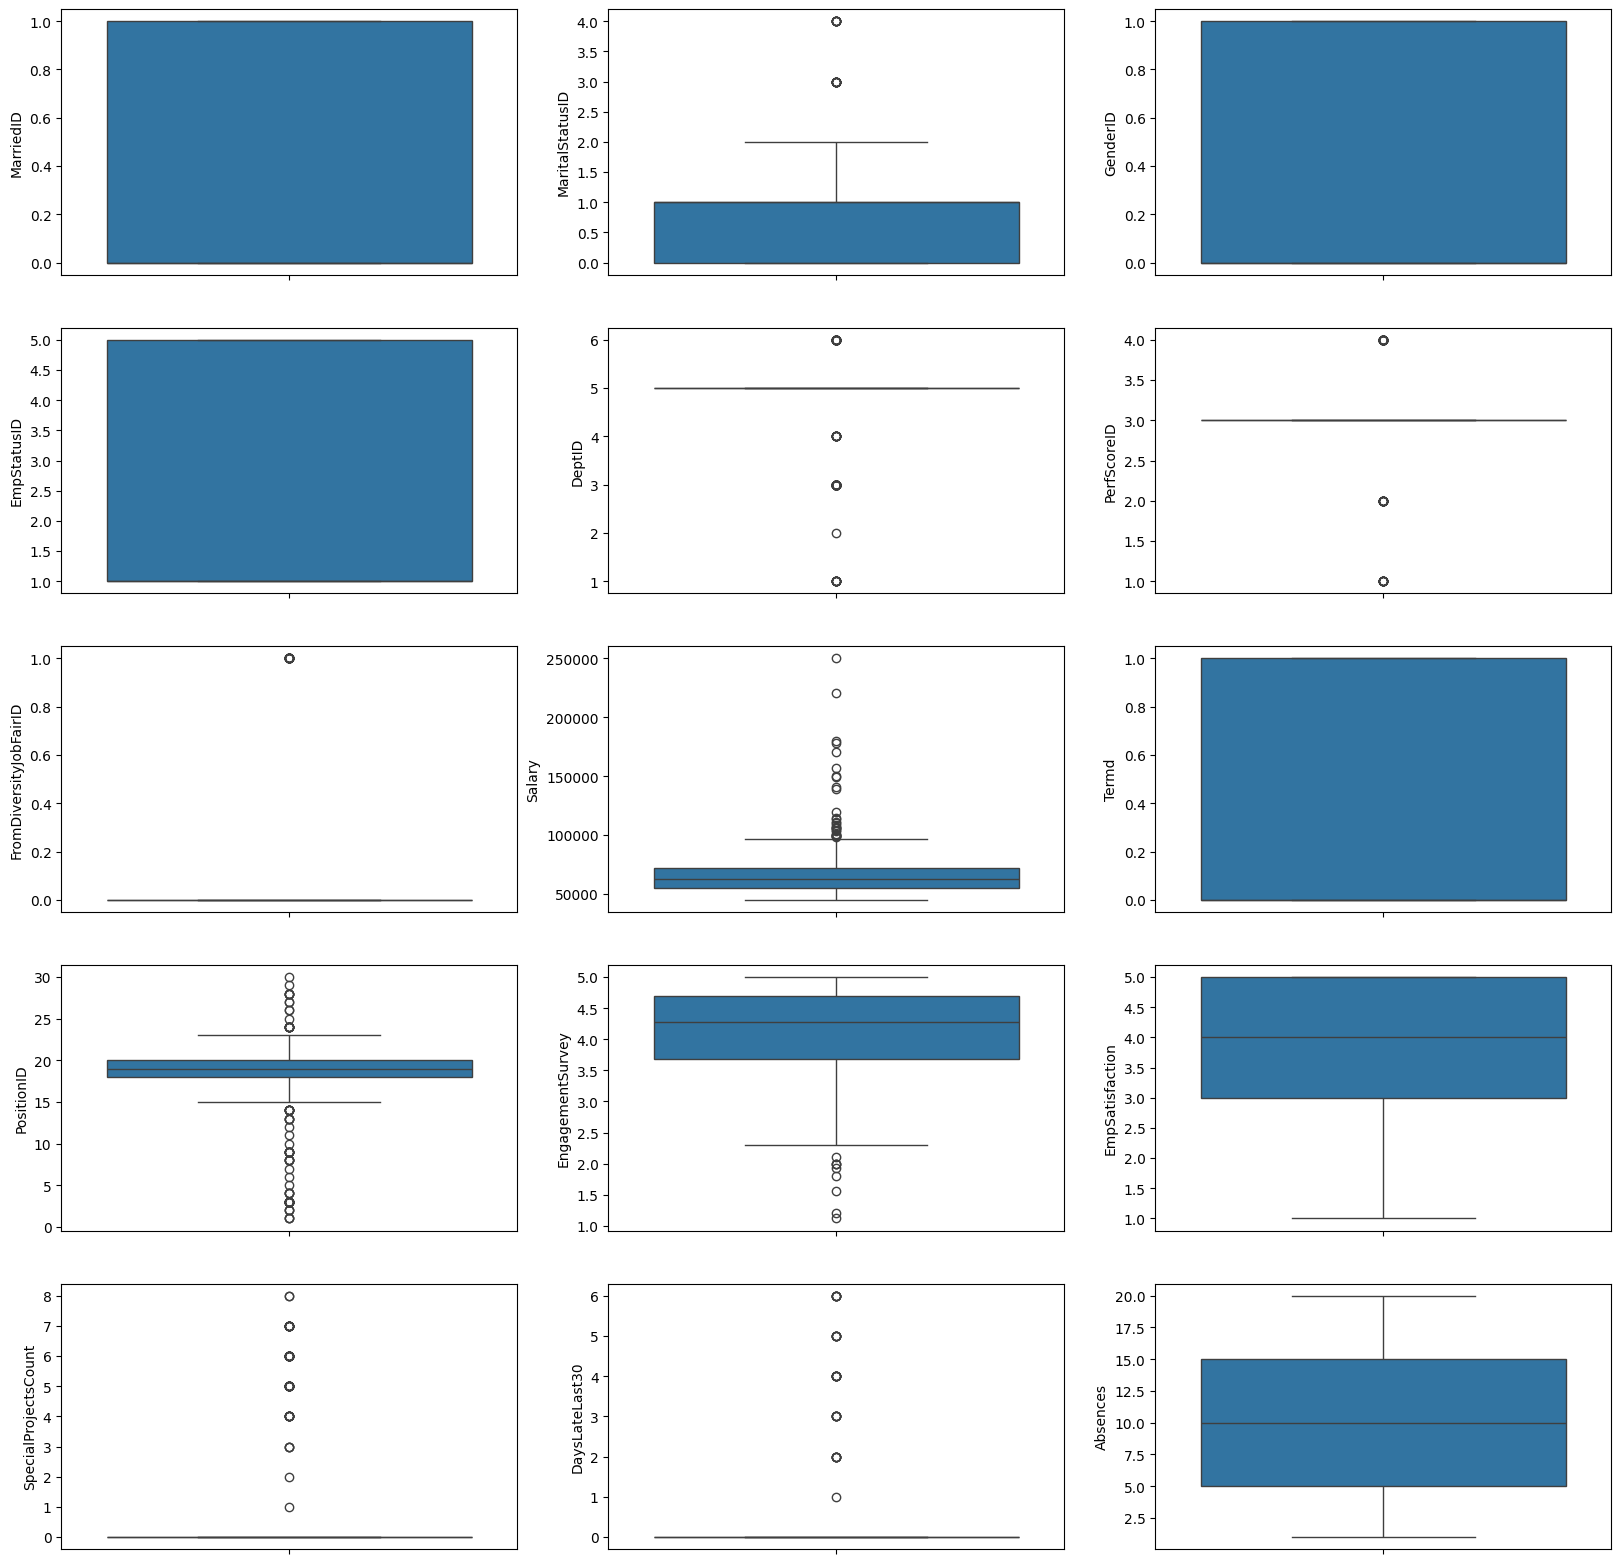

In [18]:
# Zakresy zmiennosci danych numerycznych
plt.figure(figsize=(20, 20))
for i, col in enumerate(num, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data[col])

print("nazwa kolumny, minimalne i maksymalne wartosci danych numerycznych")
for col in num:
    print(col, min(data[col]), max(data[col]))

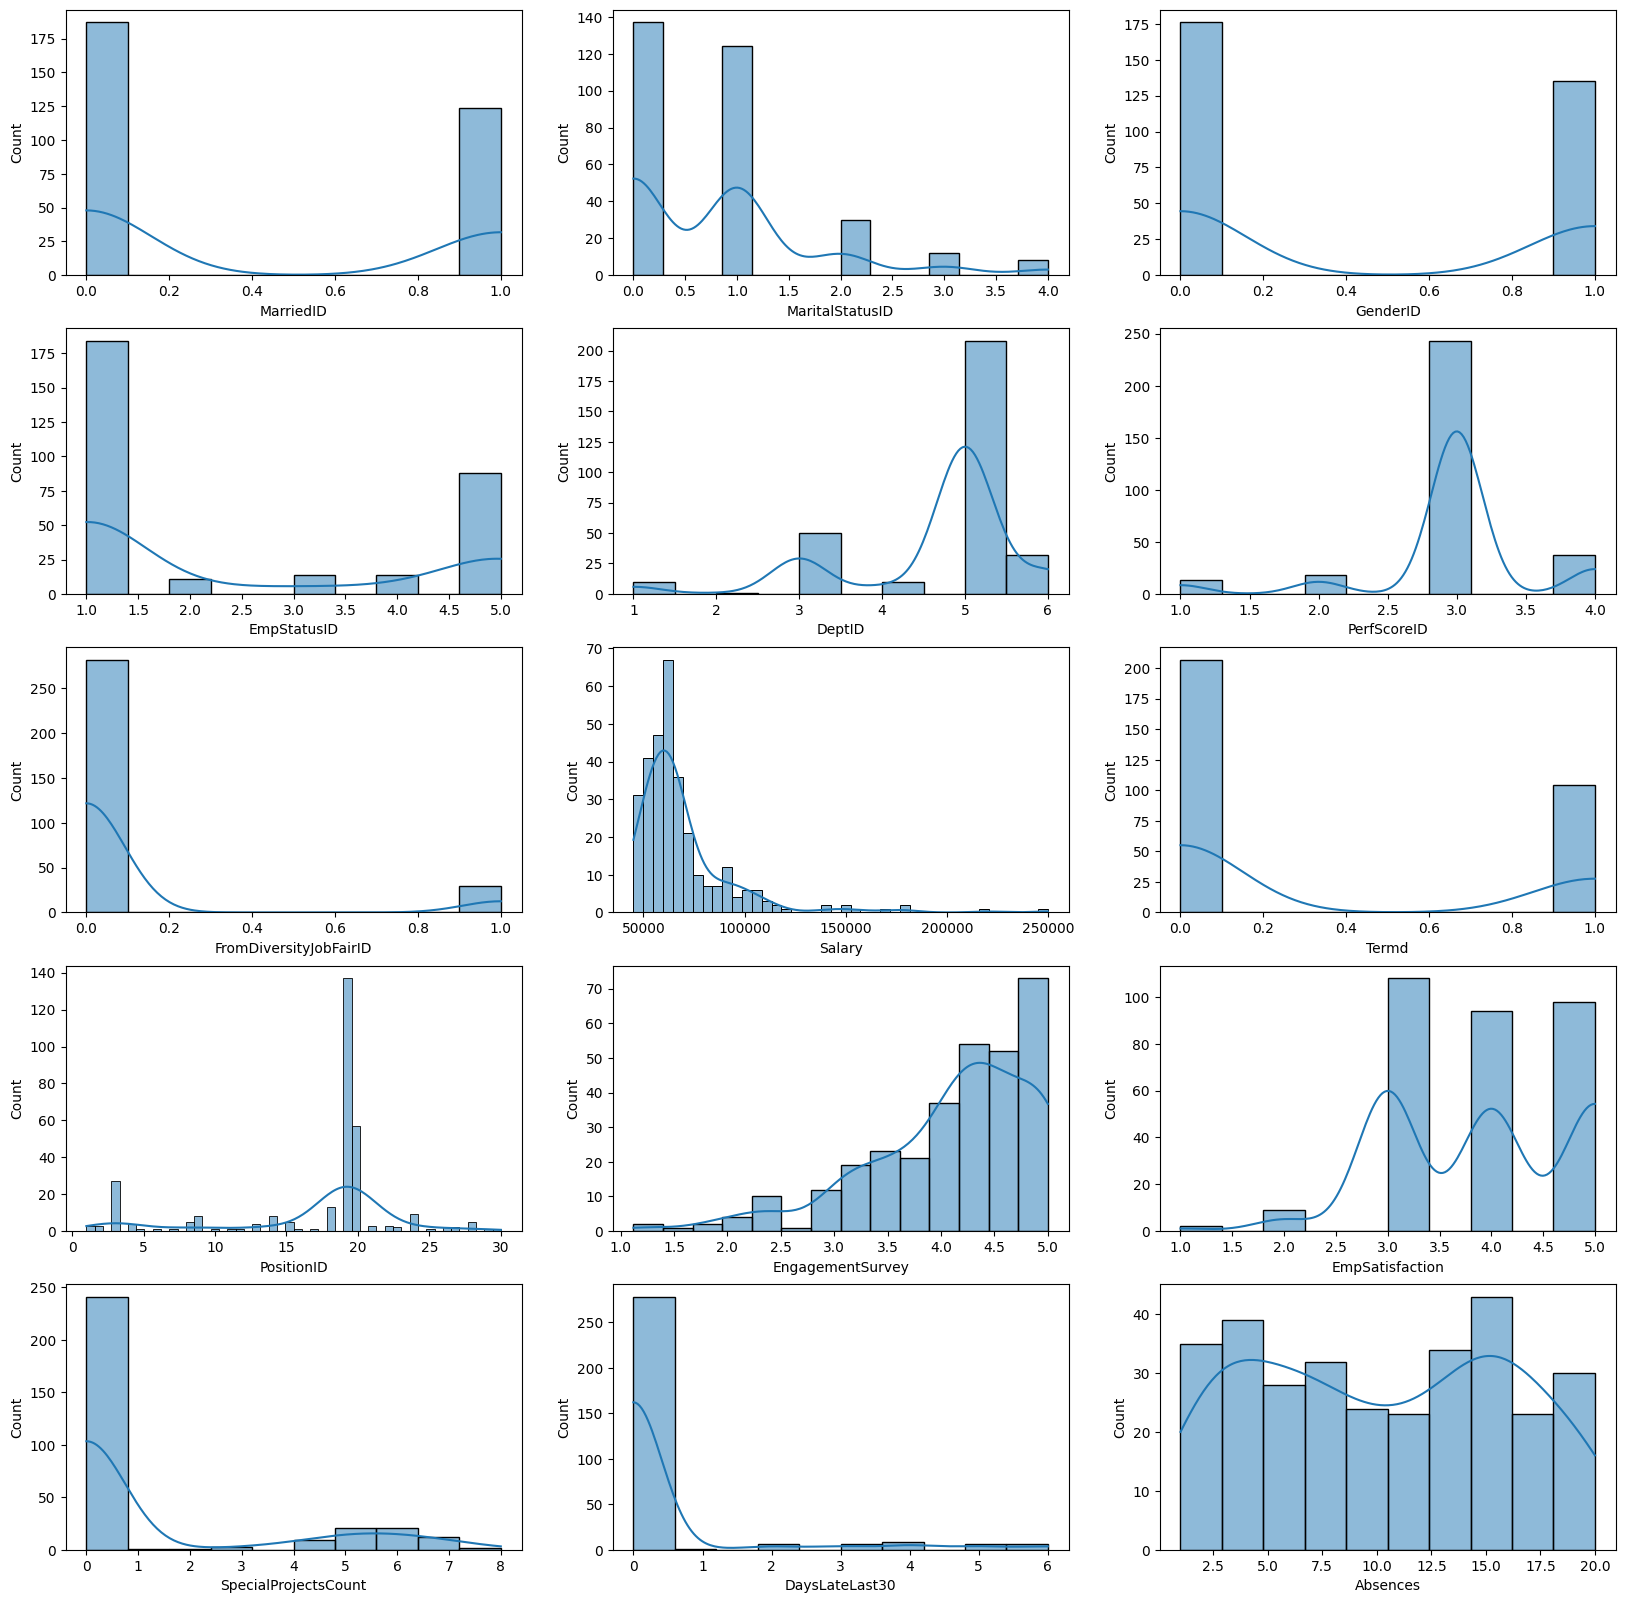

In [17]:
# Histogramy danych numerycznych with kde
plt.figure(figsize=(20, 20))
for i, col in enumerate(num, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[col], kde=True)

Interpretacja wynikow:
# TODO 
Dopisac wnioskiz rozkladu zmiennych

Podsumowanie posiadanych zmiennych w zbiorze danych
1. Employee_Name - Nazwisko i Imie Pracownika
2. EmplID - Identyfikator Pracownika
3. MarriedID - Zmienna binarna czy pracownik jest w zwiazku malzenskim (1 oznacza ze jest)
4. MaritalStatusID
5. GenderID - Zmienna binarna okreslajaca plec Pracownika (1 oznacza mezczyzne)
6. EmpStatusID
7. DeptID
8. PerfScoreID
9. FromDiversityJobFairID
10. Salary
11. Termd
12. PositionID
13. Position
14. State
15. Zip
16. DOB
17. Sex
18. MaritalDesc
19. CitizenDesc
20. HispanicLatino
21. RaceDesc
22. DateofHire
23. DateofTermination
24. TermReason
25. EmploymentStatus
26. Department
27. ManagerName
28. ManagerID
29. RecruitmentSource
30. PerformanceScore - ['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']
31. EngagementSurvey
32. EmpSatisfaction
33. SpecialProjectsCount
34. LastPerformanceReview_Date
35. DaysLateLast30
36. Absences

# TODO Podsumowac wszystkie dane 